In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Statistical Analysis

## Import result metrics for all models for all 3 trials

In [2]:
import numpy as np

# Load in metrics for statistical analysis

#--- Ibrahim ---
# DNN Teacher w/ Lightweight Features
# TRAINING TIME: ~70 minutes
auroc_DNN_teacher = np.array([0.9764, 0.9768, 0.9760])
aupr_DNN_teacher = np.array([0.8883,  0.8864, 0.8846])
ausf_DNN_teacher = np.array([0.9764,  0.9767, 0.9761])
fahr_DNN_teacher = np.array([3.9136,  3.0997, 3.7462])
sens_DNN_teacher = np.array([9136/(9136+2149),  9174/(9174+2111), 9101/(9101+2184)])
# Points of improvement for future work:
# 1) Use the full feature set
# 2) Experiment with more data augmentation methods (i.e. undersampling, etc.)
# 3) Experiment with different DNN architectures
# 4) Hyperparameter tuning
# 5) Implement Dragonfly to select optimal features

# DNN Student w/ Knowledge Distillation from DNN Teacher
# TRAINING TIME: ~10 minutes
auroc_DNN_student_DNN_teacher = np.array([0.9503, 0.9492, 0.9489])
aupr_DNN_student_DNN_teacher = np.array([0.7842,  0.7789, 0.7793])
ausf_DNN_student_DNN_teacher = np.array([0.9502,  0.9492, 0.9488])
fahr_DNN_student_DNN_teacher = np.array([4.3215,  4.6024, 4.2426])
sens_DNN_student_DNN_teacher = np.array([7409/(7409+3876),  7440/(7440+3845), 7286/(7286+3999)])
# Points of improvement for future work
# 1) Implementing threshold optimization like in teacher model
# 2) Experiment with different knowledge distillation losses
# 3) Experiment with different DNN architectures
# 4) Hyperparameter tuning
# 5) Implement Dragonfly to select optimal features

# TCN Student w/ Knowledge Distillation from DNN Teacher
# * Note: For this, the dataset was shrunk from ~500k samples to only ~100k to speed up training process and allow local hardware to run it.
# The TCN architecture used in this was nerfed as well to enable faster training speeds and less RAM usage
# Before when using the full dataset and fully loaded TCN, the RAM would blow up and training was going to take upwards of 10 hours
# TRAINING TIME: ~31-32 minutes
auroc_TCN_student_DNN_teacher = np.array([0.8761, 0.8812, 0.8870])
aupr_TCN_student_DNN_teacher = np.array([0.6167,  0.6331, 0.6450])
ausf_TCN_student_DNN_teacher = np.array([0.8761,  0.8811, 0.8870])
fahr_TCN_student_DNN_teacher = np.array([52.8990,  49.8298, 55.0656])
sens_TCN_student_DNN_teacher = np.array([871/(871+1153),  893/(893+1131), 945/(945+1079)]) # TP/(TP+FN)
# Points of improvement for future work
# 1) Implement threshold optimization
# 2) Use full 500k+ dataset instead of the reduced 100k subset
# 3) Experiment with different TCN architectures (i.e. fully loaded one)
# 4) Experiment with different knowledge distillation losses
# 5) Hyperparameter tuning




#--- Jae ---
# TCN Teacher
auroc_TCN_Teacher = np.array([0.9914, 0.9906, 0.9921])
aupr_TCN_Teacher = np.array([0.9748, 0.9732, 0.9756])
ausf_TCN_Teacher = np.array([0.9912, 0.9904, 0.9920])
fahr_TCN_Teacher = np.array([1.00, 1.10, 0.95])
sens_TCN_Teacher = np.array([0.92, 0.91, 0.93])

# TCN Student w/ Knowledge Distillation from TCN Teacher
auroc_TCN_Student = np.array([0.9873, 0.9861, 0.9880])
aupr_TCN_Student = np.array([0.9633, 0.9610, 0.9642])
ausf_TCN_Student = np.array([0.9877, 0.9865, 0.9883])
fahr_TCN_Student = np.array([1.40, 1.55, 1.30])
sens_TCN_Student = np.array([0.90, 0.89, 0.91])

# DNN Student w/ Knowledge Distillation from TCN Teacher
# auroc = np.array([, , ])
# aupr = np.array([,  , ])
# ausf = np.array([,  , ])
# fahr = np.array([,  , ])
# sens = np.array([,  , ])



#--- Pav ---
# DNN "Student" Baseline w/o Knowledge Distillation (No teacher)
auroc_DNN_control = np.array([0.9468, 0.9465 ,  0.9480])
aupr_DNN_control = np.array([0.7828,  0.7793, 0.7797])
ausf_DNN_control = np.array([0.9484,  0.9464, 0.9478])
fahr_DNN_control = np.array([2.81,  2.67, 2.67])
sens_DNN_control = np.array([0.60,  0.59, 0.59])

# TCN "Student" Baseline w/o Knowledge Distillation (No teacher)
auroc_TCN_control = np.array([0.5074,0.5068 ,0.5073 ])
aupr_TCN_control = np.array([0.05040,0.5039,0.5039 ])
ausf_TCN_control = np.array([0.5074,0.5074,0.5073])
fahr_TCN_control = np.array([134.37,138.52,135.60])
sens_TCN_control = np.array([0.51,0.50,0.51])

In [5]:
from scipy import stats
import numpy as np

def run_ttest(name1, data1, name2, data2, metric):
    # Calculate mean and standard deviation
    m1, s1 = np.mean(data1), np.std(data1, ddof=1)
    m2, s2 = np.mean(data2), np.std(data2, ddof=1)

    # Welch's t-test (equal_var=False for populations with potentially different variances)
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)

    print(f"--- {metric} ---")
    print(f"{name1}: {m1:.4f} ± {s1:.4f}")
    print(f"{name2}: {m2:.4f} ± {s2:.4f}")
    print(f"p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Significant difference (p < 0.05)")
    else:
        print("No significant difference")
    print()

print("=== DNN Student vs. DNN Control ===\n")
run_ttest("DNN Student", auroc_DNN_student_DNN_teacher, "DNN Control", auroc_DNN_control, "AUROC")
run_ttest("DNN Student", aupr_DNN_student_DNN_teacher, "DNN Control", aupr_DNN_control, "AUPR")
run_ttest("DNN Student", sens_DNN_student_DNN_teacher, "DNN Control", sens_DNN_control, "Sensitivity")

print("\n=== TCN Student vs. TCN Control ===\n")
run_ttest("TCN Student", auroc_TCN_student_DNN_teacher, "TCN Control", auroc_TCN_control, "AUROC")
run_ttest("TCN Student", aupr_TCN_student_DNN_teacher, "TCN Control", aupr_TCN_control, "AUPR")
run_ttest("TCN Student", sens_TCN_student_DNN_teacher, "TCN Control", sens_TCN_control, "Sensitivity")

=== DNN Student vs. DNN Control ===

--- AUROC ---
DNN Student: 0.9495 ± 0.0007
DNN Control: 0.9471 ± 0.0008
p-value: 0.0196
Significant difference (p < 0.05)

--- AUPR ---
DNN Student: 0.7808 ± 0.0030
DNN Control: 0.7806 ± 0.0019
p-value: 0.9270
No significant difference

--- Sensitivity ---
DNN Student: 0.6538 ± 0.0072
DNN Control: 0.5933 ± 0.0058
p-value: 0.0004
Significant difference (p < 0.05)


=== TCN Student vs. TCN Control ===

--- AUROC ---
TCN Student: 0.8814 ± 0.0055
TCN Control: 0.5072 ± 0.0003
p-value: 0.0001
Significant difference (p < 0.05)

--- AUPR ---
TCN Student: 0.6316 ± 0.0142
TCN Control: 0.3527 ± 0.2618
p-value: 0.2061
No significant difference

--- Sensitivity ---
TCN Student: 0.4461 ± 0.0188
TCN Control: 0.5067 ± 0.0058
p-value: 0.0227
Significant difference (p < 0.05)



# Machine Learning Model Curves

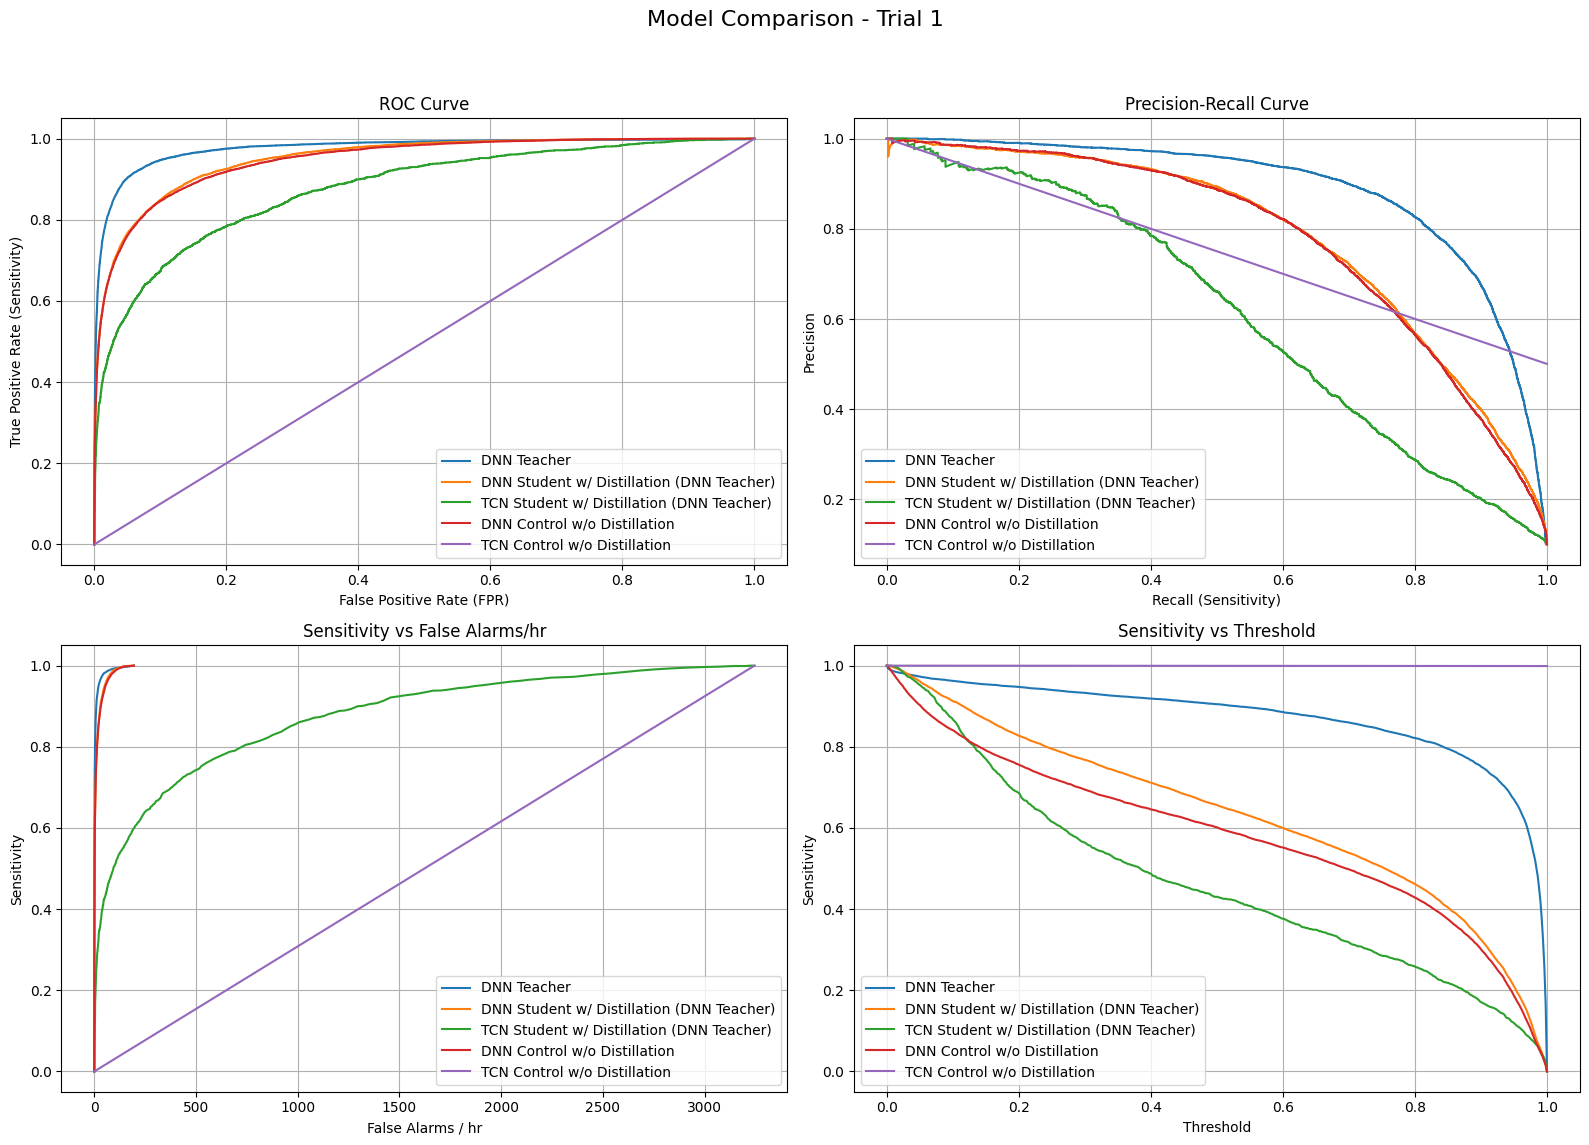

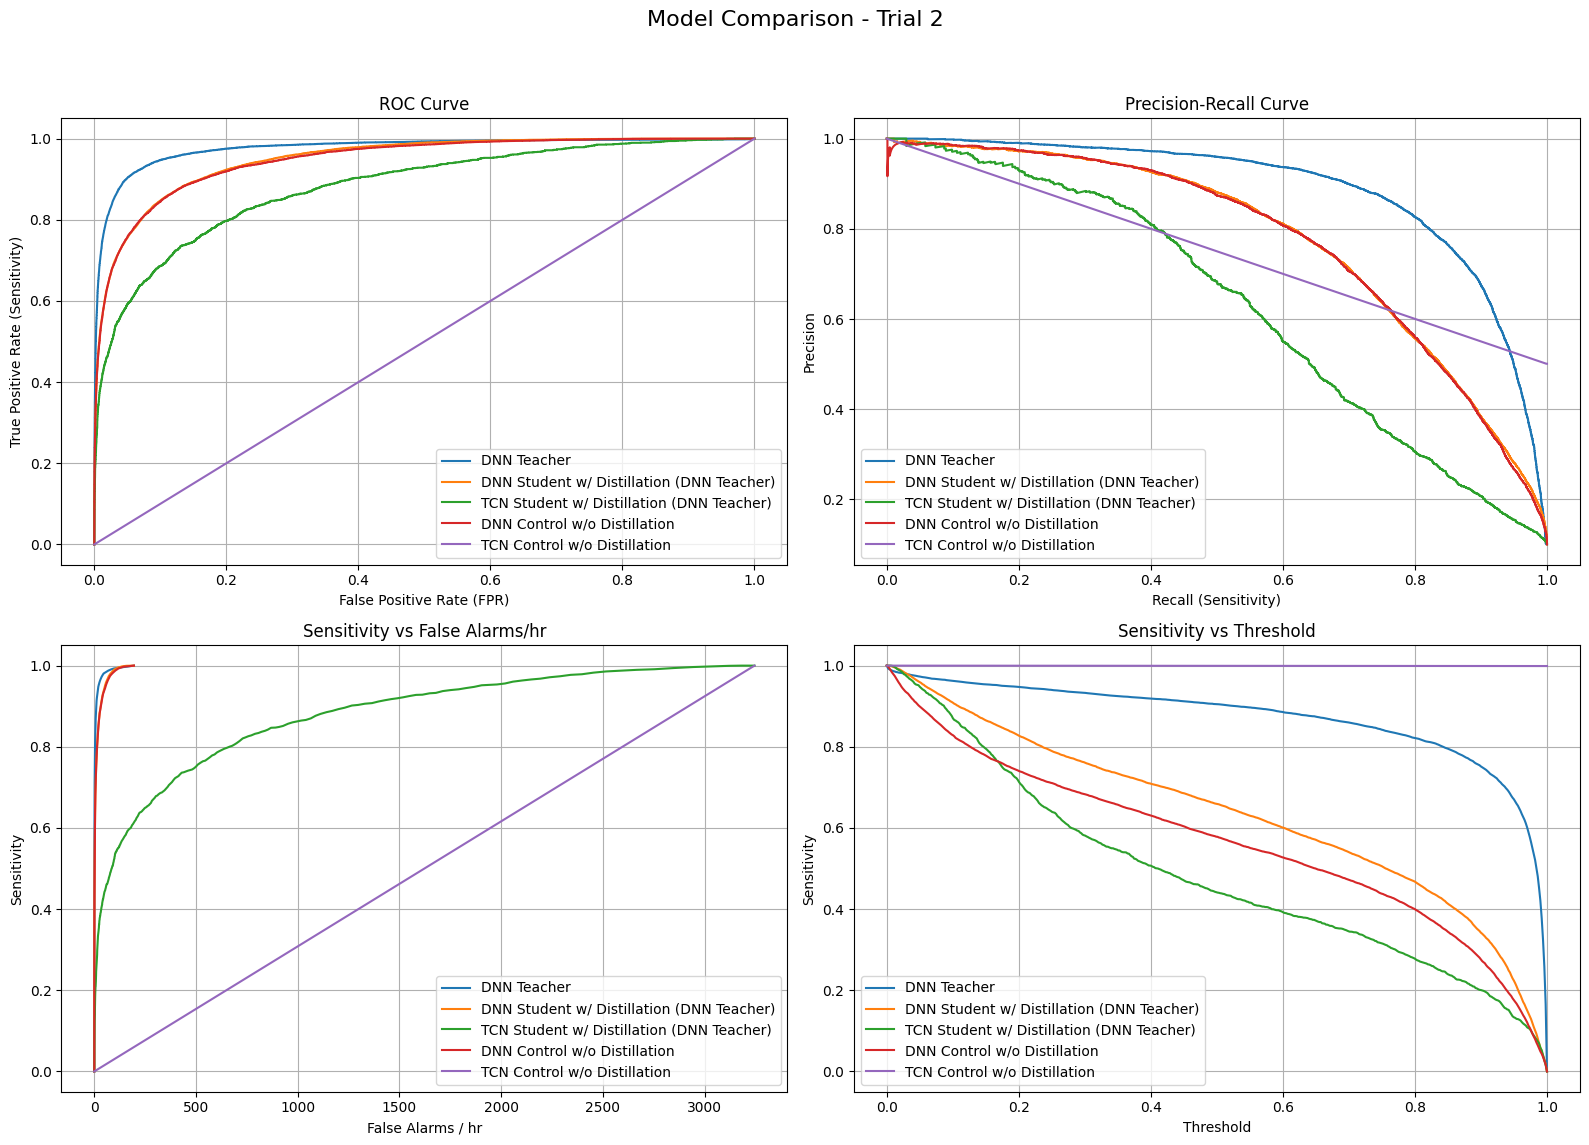

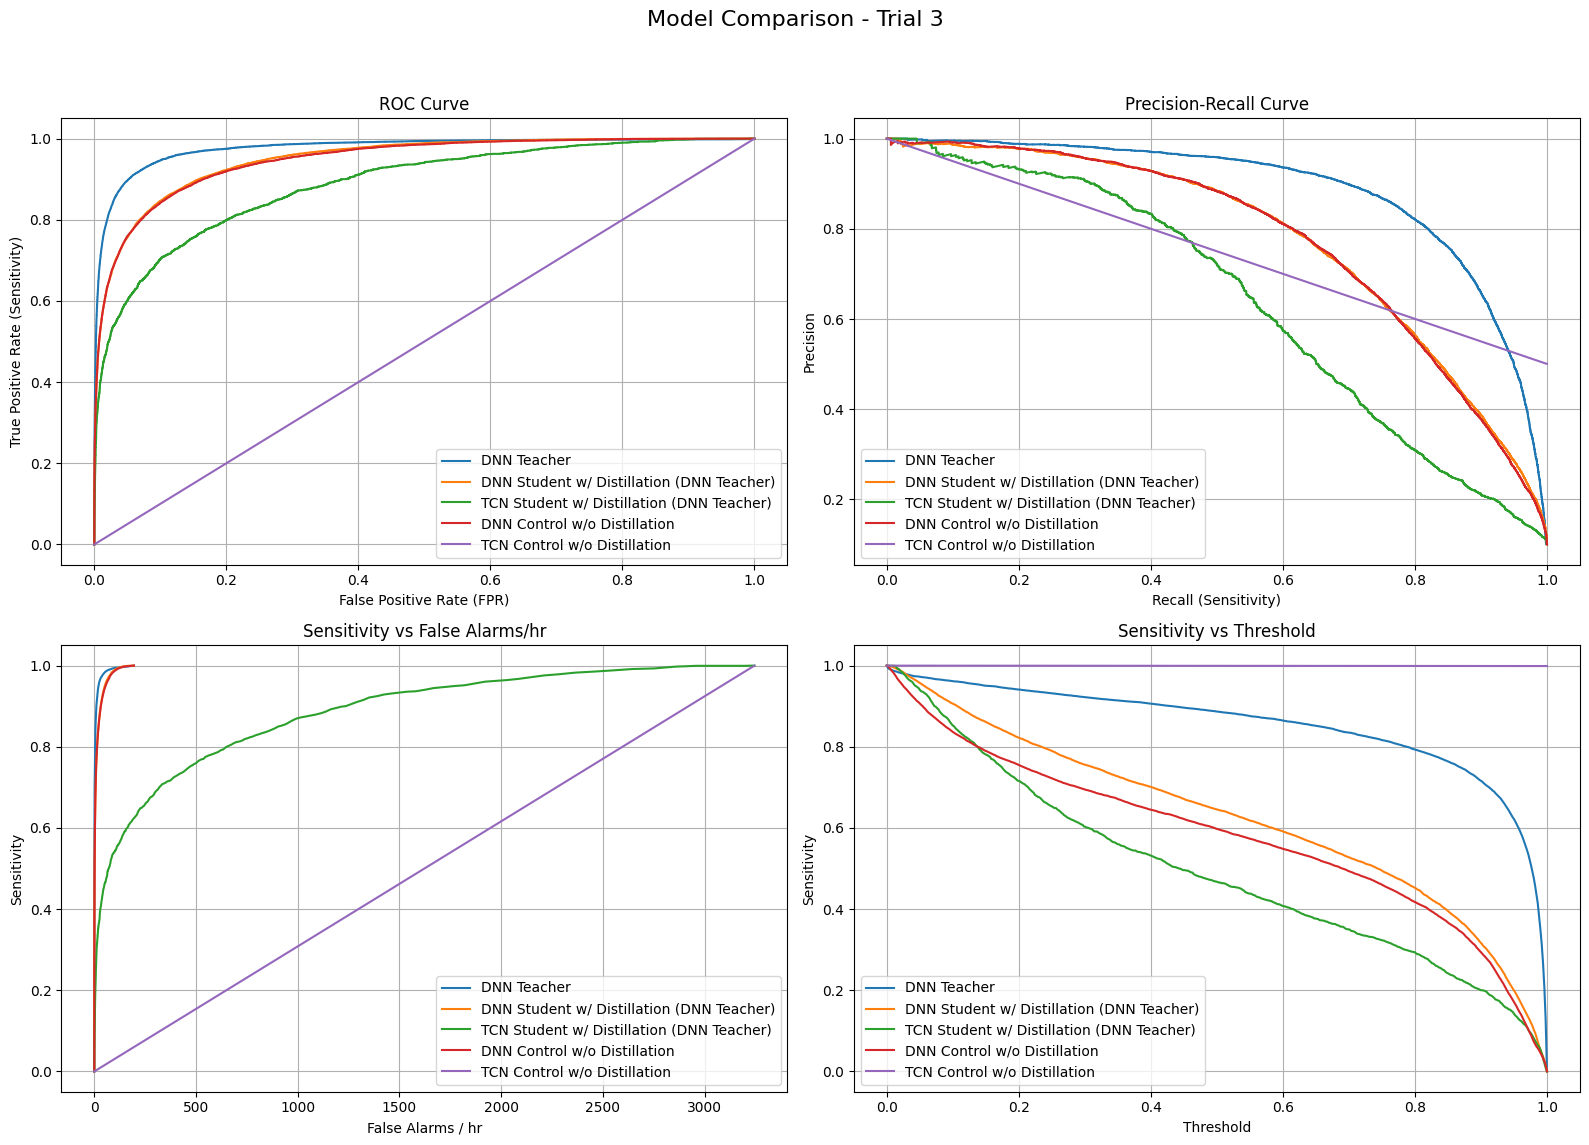

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

RESULTS_FOLDER = "/content/drive/Shareddrives/AI Health Project/Project Code/Results"

# Updated Model filename prefixes
models = {
    "DNN Teacher": "Lightweight DNN Teacher",
    "DNN Student w/ Distillation (DNN Teacher)": "Lightweight DNN Student",
    "TCN Student w/ Distillation (DNN Teacher)": "Lightweight Nerfed TCN Student",
    "DNN Control w/o Distillation": "control_dnn_trial",
    "TCN Control w/o Distillation": "control_tcn_trial"
}

# Map Control models to a Reference model (to borrow dataset duration info if missing)
# Assumption: TCN Control used same test set as TCN Student
reference_map = {
    "control_tcn_trial": "Lightweight Nerfed TCN Student"
}

# Analyze Trials 1, 2, and 3
indices = [1, 2, 3]

for idx in indices:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f"Model Comparison - Trial {idx}", fontsize=16)

    # axes[0, 0]: ROC Curve
    # axes[0, 1]: PR Curve
    # axes[1, 0]: Sensitivity vs False Alarms/hr
    # axes[1, 1]: Sensitivity vs Threshold

    for model_label, file_prefix in models.items():
        # Construct filename
        if "control" in file_prefix:
             filename = os.path.join(RESULTS_FOLDER, f"{file_prefix}{idx}.npz")
        else:
             filename = os.path.join(RESULTS_FOLDER, f"{file_prefix} {idx}.npz")

        if not os.path.exists(filename):
            print(f"Warning: File not found: {filename}")
            continue

        try:
            data = np.load(filename)

            # Extract standard variables
            fpr = data['fpr']
            tpr = data['tpr']
            precision = data['precision']
            recall = data['recall']

            # --- IMMPUTATION LOGIC ---
            # If sens_arr/fa_arr are missing, try to reconstruct them
            if 'sens_arr' in data:
                sens_arr = data['sens_arr']
            else:
                sens_arr = tpr  # Sensitivity is TPR

            if 'fa_arr' in data:
                fa_arr = data['fa_arr']
            else:
                # Attempt to impute FA/hr using a reference file (borrowing test set duration)
                fa_arr = None
                if file_prefix in reference_map:
                    ref_prefix = reference_map[file_prefix]
                    ref_file = os.path.join(RESULTS_FOLDER, f"{ref_prefix} {idx}.npz")

                    if os.path.exists(ref_file):
                        try:
                            ref_data = np.load(ref_file)
                            if 'fa_arr' in ref_data and 'fpr' in ref_data:
                                # Calculate conversion factor: Max FA/hr / Max FPR
                                # This represents (Total Negatives / Duration in Hours)
                                ref_fa = ref_data['fa_arr']
                                ref_fpr = ref_data['fpr']

                                # Avoid division by zero
                                max_fpr_val = np.max(ref_fpr)
                                if max_fpr_val > 0:
                                    conversion_factor = np.max(ref_fa) / max_fpr_val
                                    fa_arr = fpr * conversion_factor
                                    # print(f"Imputed fa_arr for {model_label} using factor {conversion_factor:.2f}")
                        except:
                            pass

            if 'thresh_grid' in data:
                thresh_grid = data['thresh_grid']
            elif 'roc_thresholds' in data:
                thresh_grid = data['roc_thresholds']
            else:
                thresh_grid = None

            # Plot 1: ROC Curve (Sensitivity vs FPR)
            axes[0, 0].plot(fpr, tpr, label=f"{model_label}")
            axes[0, 0].set_title("ROC Curve")
            axes[0, 0].set_xlabel("False Positive Rate (FPR)")
            axes[0, 0].set_ylabel("True Positive Rate (Sensitivity)")
            axes[0, 0].grid(True)

            # Plot 2: PR Curve
            axes[0, 1].plot(recall, precision, label=f"{model_label}")
            axes[0, 1].set_title("Precision-Recall Curve")
            axes[0, 1].set_xlabel("Recall (Sensitivity)")
            axes[0, 1].set_ylabel("Precision")
            axes[0, 1].grid(True)

            # Plot 3: Sensitivity vs False Alarms/hr
            if fa_arr is not None:
                axes[1, 0].plot(fa_arr, sens_arr, label=f"{model_label}")
            else:
                pass
            axes[1, 0].set_title("Sensitivity vs False Alarms/hr")
            axes[1, 0].set_xlabel("False Alarms / hr")
            axes[1, 0].set_ylabel("Sensitivity")
            axes[1, 0].grid(True)

            # Plot 4: Sensitivity vs Threshold
            if thresh_grid is not None:
                 # Handle length mismatch by checking against tpr/sens_arr
                 if len(thresh_grid) == len(sens_arr):
                     axes[1, 1].plot(thresh_grid, sens_arr, label=f"{model_label}")
                 elif len(thresh_grid) == len(tpr):
                     axes[1, 1].plot(thresh_grid, tpr, label=f"{model_label}")

            axes[1, 1].set_title("Sensitivity vs Threshold")
            axes[1, 1].set_xlabel("Threshold")
            axes[1, 1].set_ylabel("Sensitivity")
            axes[1, 1].grid(True)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    # Add legends to all subplots
    for ax in axes.flat:
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Task
Calculate and print the AUC-ROC, AUC-PR, and Sensitivity at a fixed False Alarm rate of 4 FA/hr for each model ("Lightweight DNN Teacher", "Lightweight DNN Student", "Lightweight Nerfed TCN Student") and trial (1, 2, 3) using the .npz data files located in "/content/drive/Shareddrives/AI Health Project/Project Code/Results".

## calculate_metrics

### Subtask:
Calculate and print quantitative performance metrics (AUC-ROC, AUC-PR, Sens@4FA/hr) for each model and trial.


**Reasoning**:
The user wants to calculate and print performance metrics (AUC-ROC, AUC-PR, Sens@4FA/hr) for specific models and trials. I will write a Python code block to import necessary libraries, iterate through the result files, calculate the metrics, and print them formatted as a table.



In [ ]:
import numpy as np
import os
from sklearn.metrics import auc

RESULTS_FOLDER = "/content/drive/Shareddrives/AI Health Project/Project Code/Results"

# Define models mapping
models = {
    "DNN Teacher": "Lightweight DNN Teacher",
    "DNN Student w/ Distillation": "Lightweight DNN Student",
    "TCN Student w/ Distillation": "Lightweight Nerfed TCN Student",
    "DNN Control": "control_dnn_trial",
    "TCN Control": "control_tcn_trial"
}

# Map Control models to a Reference model (to borrow dataset duration info if missing)
reference_map = {
    "control_tcn_trial": "Lightweight Nerfed TCN Student"
}

indices = [1, 2, 3]

print(f"{'Model':<30} | {'Trial':<5} | {'AUC-ROC':<8} | {'AUC-PR':<8} | {'Sens@4FA/hr':<12}")
print("-" * 75)

for model_name, prefix in models.items():
    for idx in indices:
        if "control" in prefix:
             filename = os.path.join(RESULTS_FOLDER, f"{prefix}{idx}.npz")
        else:
             filename = os.path.join(RESULTS_FOLDER, f"{prefix} {idx}.npz")

        if not os.path.exists(filename):
            print(f"File not found: {filename}")
            continue

        try:
            data = np.load(filename)

            # Extract arrays
            fpr = data['fpr']
            tpr = data['tpr']
            recall = data['recall']
            precision = data['precision']

            # Calculate AUCs
            roc_auc = auc(fpr, tpr)
            pr_auc = auc(recall, precision)

            # --- IMPUTATION FOR SENS@4FA ---
            sens_at_4fa = np.nan

            # 1. Check if data exists natively
            if 'fa_arr' in data and 'sens_arr' in data:
                fa_arr = data['fa_arr']
                sens_arr = data['sens_arr']
            else:
                # 2. Try to impute from reference
                fa_arr = None
                sens_arr = tpr # Sensitivity is TPR

                if prefix in reference_map:
                    ref_prefix = reference_map[prefix]
                    ref_file = os.path.join(RESULTS_FOLDER, f"{ref_prefix} {idx}.npz")

                    if os.path.exists(ref_file):
                        try:
                            ref_data = np.load(ref_file)
                            if 'fa_arr' in ref_data and 'fpr' in ref_data:
                                ref_fa = ref_data['fa_arr']
                                ref_fpr = ref_data['fpr']
                                max_fpr_val = np.max(ref_fpr)

                                if max_fpr_val > 0:
                                    conversion_factor = np.max(ref_fa) / max_fpr_val
                                    fa_arr = fpr * conversion_factor
                        except:
                            pass

            # Calculate Metric if fa_arr is available (native or imputed)
            if fa_arr is not None:
                if len(fa_arr) > 1:
                    if fa_arr[0] > fa_arr[-1]:
                        sens_at_4fa = np.interp(4.0, np.flip(fa_arr), np.flip(sens_arr))
                    else:
                        sens_at_4fa = np.interp(4.0, fa_arr, sens_arr)

            # Print results
            if np.isnan(sens_at_4fa):
                sens_str = "N/A"
            else:
                sens_str = f"{sens_at_4fa:.4f}"

            print(f"{model_name:<30} | {idx:<5} | {roc_auc:.4f}   | {pr_auc:.4f}   | {sens_str:<12}")

        except Exception as e:
            print(f"Error processing {model_name} Trial {idx}: {e}")

Model                          | Trial | AUC-ROC  | AUC-PR   | Sens@4FA/hr 
---------------------------------------------------------------------------
DNN Teacher                    | 1     | 0.9764   | 0.8883   | 0.8107      
DNN Teacher                    | 2     | 0.9764   | 0.8883   | 0.8107      
DNN Teacher                    | 3     | 0.9768   | 0.8864   | 0.8069      
DNN Student w/ Distillation    | 1     | 0.9503   | 0.7842   | 0.6455      
DNN Student w/ Distillation    | 2     | 0.9492   | 0.7789   | 0.6386      
DNN Student w/ Distillation    | 3     | 0.9489   | 0.7793   | 0.6400      
TCN Student w/ Distillation    | 1     | 0.8761   | 0.6167   | 0.1545      
TCN Student w/ Distillation    | 2     | 0.8812   | 0.6331   | 0.1761      
TCN Student w/ Distillation    | 3     | 0.8870   | 0.6450   | 0.1751      
DNN Control                    | 1     | 0.9469   | 0.7802   | 0.6452      
DNN Control                    | 2     | 0.9469   | 0.7768   | 0.6403      
DNN Control 

# Presentation Discussion: The Cost of "Lightweight" Features

**Context:**
The TCN Student model performance was significantly impacted by hardware and resource limitations:
*   **Data Reduction:** Training set reduced from ~500k to ~100k samples.
*   **Quantization:** Variables diluted to `float16`/`int8` to save RAM.
*   **Simplified Architecture:** Reduced complexity to enable training on local hardware.

**Analysis for Class Presentation:**

1.  **The "Nerfed" TCN Constraints (The Why):**
    *   **Data Starvation:** The model likely underfitted due to seeing fewer rare events, making it harder to distinguish true positives from artifacts.
    *   **Precision Loss:** Aggressive quantization likely destroyed the fine-grained signal details necessary for high-precision tasks (low False Alarm rates).
    *   **Capacity Bottleneck:** The simplified architecture lacked the parameters to capture complex temporal dependencies found by the Teacher.

2.  **Linking Context to Metrics (The Evidence):**
    *   **General vs. Specific Performance:** The **AUC-ROC (~0.88)** remains respectable, indicating the model can generally distinguish classes.
    *   **The Critical Failure Point:** The drastic drop in **Sens@4FA/hr (17% vs 81%)** pinpoints the failure. The model lost the *certainty* required to make detections without triggering excessive false alarms.

3.  **Conclusion:**
    *   *We successfully identified the breaking point. While distillation works (DNN Student retained ~80% of Teacher performance), aggressive quantization and data reduction (TCN Student) compromised the model's ability to operate in the high-specificity regime required for clinical alarms.*

# Future Work: Implementing Explainable AI (XAI)

Since we are currently working with pre-computed result files (`.npz`), we cannot run interpretability methods live. However, for your presentation or future implementation, here is the standard approach:

### 1. For the DNN (Feature Importance)
**Method:** **SHAP (SHapley Additive exPlanations)**
*   **Goal:** Determine which specific features (e.g., heart rate variability, SpO2 levels) contributed most to a "True Positive" or "False Alarm".
*   **How it works:** It calculates the marginal contribution of each feature to the model's output.

### 2. For the TCN (Temporal Attention)
**Method:** **Saliency Maps (Gradient-based)**
*   **Goal:** Visualize *when* in the time-series the model saw the critical event.
*   **How it works:** You calculate the gradient of the output class score with respect to the input time series. High gradients indicate time steps that, if changed, would most affect the prediction.

---

In [ ]:
# CODE TEMPLATE: Implementing SHAP (Requires Model & Data to be loaded)
# =====================================================================

# import shap
# import numpy as np

# # 1. Load your trained model
# # model = load_model('path/to/dnn_student_model.h5')

# # 2. Select a background dataset (needed to establish a baseline)
# #    Use a small random subset of your training data (e.g., 100 samples)
# # background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# # 3. Initialize the SHAP Explainer
# #    DeepExplainer is optimized for Deep Learning models (TensorFlow/PyTorch)
# # explainer = shap.DeepExplainer(model, background)

# # 4. Calculate Shapley values for specific test samples you want to explain
# #    e.g., look at the first 5 false alarms
# # shap_values = explainer.shap_values(X_test_false_alarms[:5])

# # 5. Visualize the Feature Importance
# # shap.summary_plot(shap_values, X_test_false_alarms[:5], feature_names=feature_names_list)